# Video: Comparing Memory Usage of NumPy Arrays vs Python lists

This video compares the memory usage of NumPy arrays and Python lists, and exactly quantifies the differences in space usage.

Script:
* At the beginning of this module, we saw that current 64 bit floating numbers which should take 8 bytes are taking 24 bytes.

In [ ]:
import sys
sys.getsizeof(3.0)

24

Script:
* What if we convert that to NumPy?

In [ ]:
import numpy as np
sys.getsizeof(np.asarray(3.0))

104

Script:
* Eek!
* NumPy is not the most efficient way to handle individual numbers.
* That is thirteen x overhead.
* Let's look at a bigger array, since we have been saying that NumPy will be more efficient for lots of numbers.

In [ ]:
test_array = np.arange(1_000_000, dtype=np.float64)
sys.getsizeof(test_array)

8000112

Script:
* That test array just created has one million numbers, counting up from zero like the range function.
* The dtype parameter is to be explicit about what type of array we are making, so we can be 100% certain.
* Since each of those values takes 8 bytes, the minimum space to store them is 8 million bytes.
* The total size for the array is 8 million one hundred and twelve.
* So only one hundred and twelve bytes of overhead here.

Script:
* What about storing the same numbers in a list?


In [ ]:
test_list = [float(v) for v in range(1_000_000)]
sys.getsizeof(test_list)

8448728

Script:
* The size of the list is less than 6% bigger than the NumPy array, but there's an important disclaimer - that does not include the size of all the numbers in the list.
* Reading the documentation of `getsizeof`,

https://docs.python.org/3/library/sys.html
> Only the memory consumption directly attributed to the object is accounted for, not the memory consumption of objects it refers to.

* So a Python list's size reported does not include the sizes of the objects inside the list.

In [ ]:
sys.getsizeof(test_list) + sum(sys.getsizeof(v) for v in test_list)

32448728

Script:
* So storing the same numbers actually takes about 4 times as much space with a Python list compared to a NumPy array.
* The exact ratios will depend based on how many numbers are involved, and the ratio will vary with the number of dimensions and details of how Python manages memory.
* Let's look at a chart of that now.

Memory Usage - Lists vs NumPy Arrays


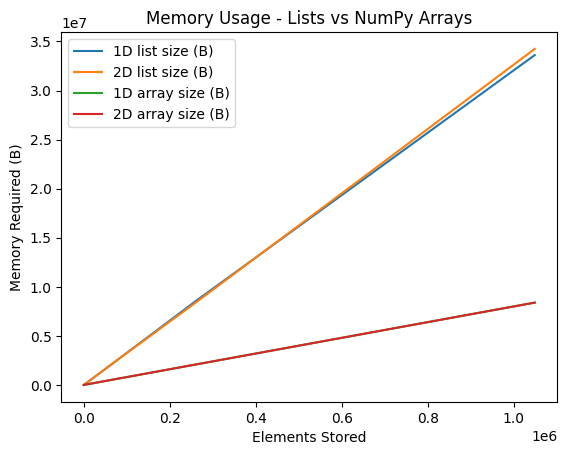

In [ ]:
import math
import matplotlib.pyplot as plt

element_counts = []
list_1d_sizes = []
list_2d_sizes = []
array_1d_sizes = []
array_2d_sizes = []

for k in range(11):
    element_counts.append(4**k)

    test_list_1d = [math.sin(i) for i in range(element_counts[-1])]
    list_1d_sizes.append(sys.getsizeof(test_list_1d) + sum(sys.getsizeof(e) for e in test_list_1d))

    test_list_2d = [[math.sin(j) for j in range(2**k)] for i in range(2**k)]
    list_2d_sizes.append(sys.getsizeof(test_list_2d) + sum(sys.getsizeof(r) + sum(sys.getsizeof(e) for e in r) for r in test_list_2d))

    test_array_1d = np.asarray(test_list_1d)
    array_1d_sizes.append(sys.getsizeof(test_array_1d))

    test_array_2d = np.asarray(test_list_2d)
    array_2d_sizes.append(sys.getsizeof(test_array_2d))

    assert(test_array_1d.size == test_array_2d.size)

plt.plot(element_counts, list_1d_sizes, label="1D list size (B)")
plt.plot(element_counts, list_2d_sizes, label="2D list size (B)")
plt.plot(element_counts, array_1d_sizes, label="1D array size (B)")
plt.plot(element_counts, array_2d_sizes, label="2D array size (B)")

plt.legend()
plt.xlabel("Elements Stored")
plt.ylabel("Memory Required (B)")
plt.title("Memory Usage - Lists vs NumPy Arrays")
None

Script:
* This chart was made by making a lot of example arrays and calling getsizeof repeatedly, just like the previous example.
* You can see that 1 dimension vs two dimensions makes a small but visible differences when using Python lists, but the difference is invisible for NumPy arrays.
* Curiously, two dimensional Python lists seem slightly more efficient.
* But that slight efficiency gain is trivial compared to the big drop switching to NumPy arrays.
* Both sides have very linear memory requirements, so that performance ratio stays the same as scale increases.
* That memory difference will become more and more important as we work with more data, so we will strongly favor using libraries like NumPy or other libraries based on NumPy for managing lots of numbers.